In [2]:
!pip install openpyxl
!pip install fancyimpute


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

%matplotlib inline


In [29]:
df=pd.read_excel("E Commerce Dataset.xlsx" ,sheet_name='E Comm')
desc=pd.read_excel("E Commerce Dataset.xlsx" , sheet_name='Data Dict')

In [30]:
desc

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
5,NaN,E Comm,CityTier,City tier
6,NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,NaN,E Comm,Gender,Gender of customer
9,NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [31]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [32]:
df.shape

(5630, 20)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [34]:
df[df['Churn']==1].shape[0]/df.shape[0] *100

16.838365896980463

only 17% of the data is showing churn

In [35]:
churn=df['Churn'].value_counts().reset_index()
churn

,index,Churn
0,0,4682
1,1,948


<Axes: xlabel='index', ylabel='Churn'>

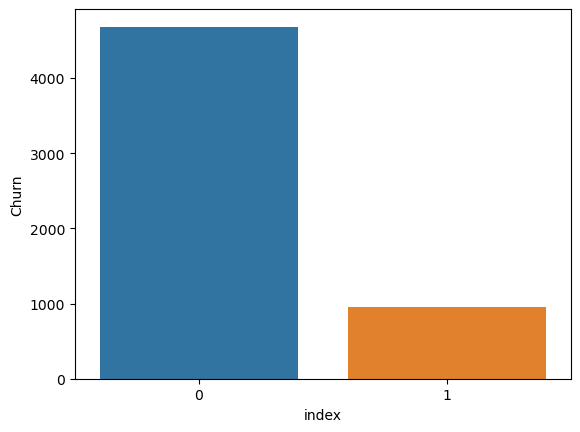

In [36]:
sns.barplot(x=churn['index'] , y=churn['Churn'])

# In Data Analysis We will Analyze To Find out the below stuff
Missing Values<br>
All The Numerical Variables<br>
Distribution of the Numerical Variables<br>
Categorical Variables<br>
Cardinality of Categorical Variables<br>
Outliers<br>
Relationship between independent and dependent feature(Churn)<br>

# Missing Values

In [37]:
df.isnull().sum()


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [38]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Tenure 0.0469  % missing values
WarehouseToHome 0.0446  % missing values
HourSpendOnApp 0.0453  % missing values
OrderAmountHikeFromlastYear 0.0471  % missing values
CouponUsed 0.0455  % missing values
OrderCount 0.0458  % missing values
DaySinceLastOrder 0.0545  % missing values


<Axes: >

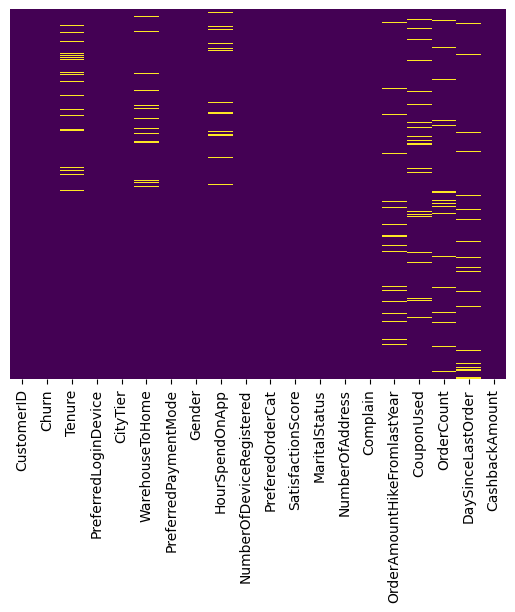

In [39]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

<h3>Since they are many missing values,<br>
We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [40]:
# list of numerical variables
numerical_features =[feature for feature in df.columns if df[feature].dtypes!='O']

print('Number of Numerical variable :', len(numerical_features) )

# visualise the numerical variables
df[numerical_features].head()

Number of Numerical variable : 15


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,129.60


In [14]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_22960\867096850.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

<Axes: xlabel='Tenure', ylabel='Count'>

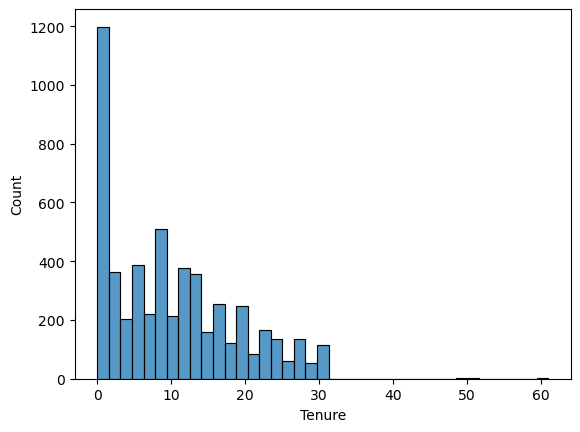

In [42]:
sns.histplot(df['Tenure'])

<Axes: >

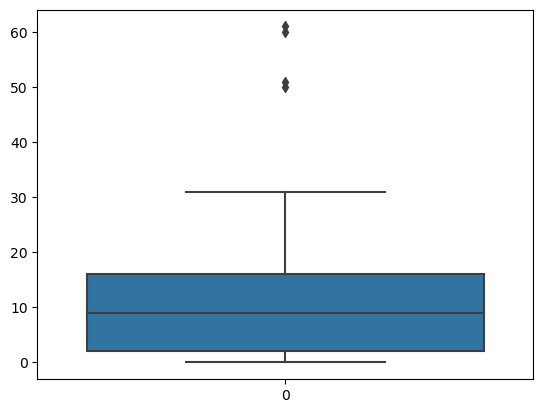

In [43]:
sns.boxplot(df['Tenure'])

We seen that there are some outlier present in feature Teunre , so we have to remove it 

<Axes: xlabel='Tenure', ylabel='Density'>

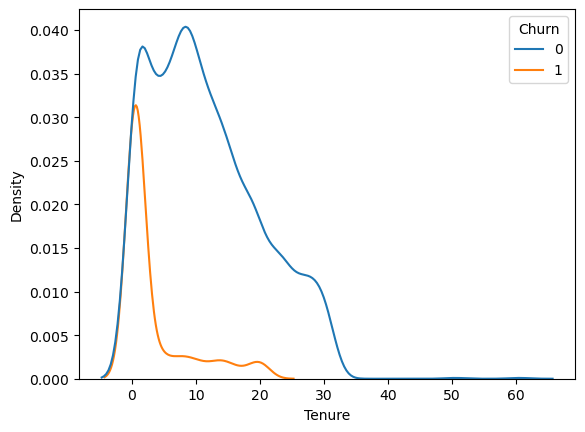

In [44]:
sns.kdeplot(x=df['Tenure'] , hue = df['Churn'])

Here we can see,<br>
 1 .less Tenure -> high chance to Churn <br>
 2 .Maximum tenure is more than 20, after that there are less chances that customer will churn.<br>
 3. It is right-skewed.<br>
The above graph shows the relationship between tenure and churning. The lesser the tenure, more are the chances to churn. So, one of the ways to reduce customer churning would be to retain the customers for longer tenure, so it reduces the chances of churning.



In [45]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [46]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

Here we can see that Mobile Phone and Phone looking same entites , so we can replace one of them into one

In [47]:
df['PreferredLoginDevice'].replace({'Mobile Phone': 'Phone'} ,inplace=True)

In [48]:
df['PreferredLoginDevice'].unique()

array(['Phone', 'Computer'], dtype=object)

Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

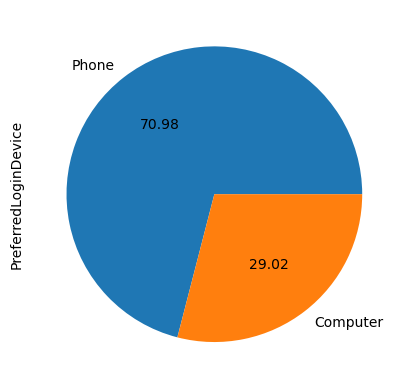

In [49]:
df['PreferredLoginDevice'].value_counts().plot(kind='pie',autopct='%.2f')
df['PreferredLoginDevice'].value_counts()

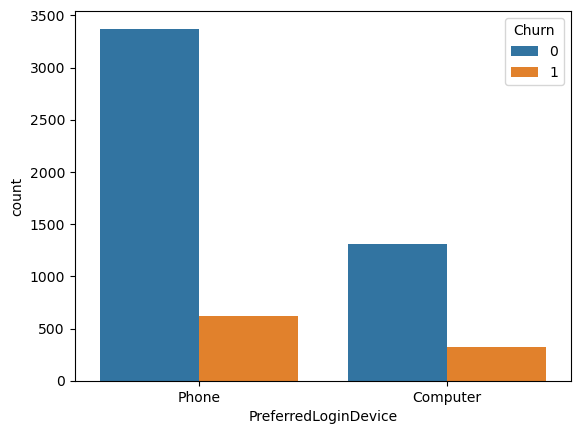

In [50]:
ax=sns.countplot(x=df['PreferredLoginDevice'] , hue=df['Churn'])
# plt.xticks(rotation = 90)


In [51]:
def calculate_ratio(ax):
    l=len(ax.patches)
    cnt=0
    without_churn=[]
    with_churn=[]
    
    for p in ax.patches:
        if cnt<l/2:
            without_churn.append(p.get_height())
        else:
            with_churn.append(p.get_height())
        cnt+=1
    
    print("without_churn",without_churn)
    print("with_churn",with_churn)
    
    ratio=[]
    
    for i in range(len(with_churn)):
        ratio.append(with_churn[i]/without_churn[i])
    print("ratio",ratio)    
        
        

In [52]:
calculate_ratio(ax)

without_churn [3372.0, 1310.0]
with_churn [624.0, 324.0]
ratio [0.18505338078291814, 0.24732824427480915]


So from above ration we seen that computer has max ration,


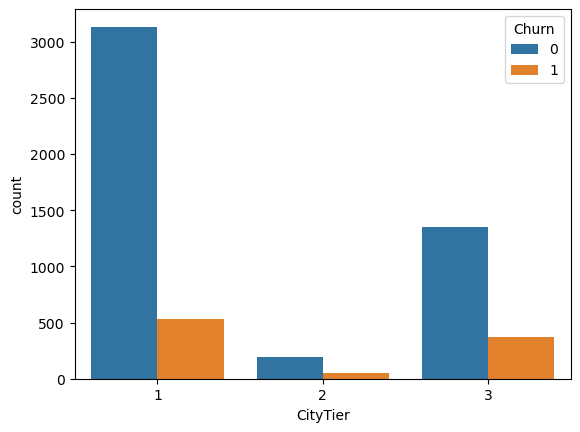

In [53]:
ct=sns.countplot(x=df['CityTier'] , hue=df['Churn'])


In [54]:
calculate_ratio(ct)

without_churn [3134.0, 194.0, 1354.0]
with_churn [532.0, 48.0, 368.0]
ratio [0.16975111678366306, 0.24742268041237114, 0.2717872968980798]


<b>Here higher ration find in CityTier 3

<Axes: xlabel='WarehouseToHome', ylabel='Count'>

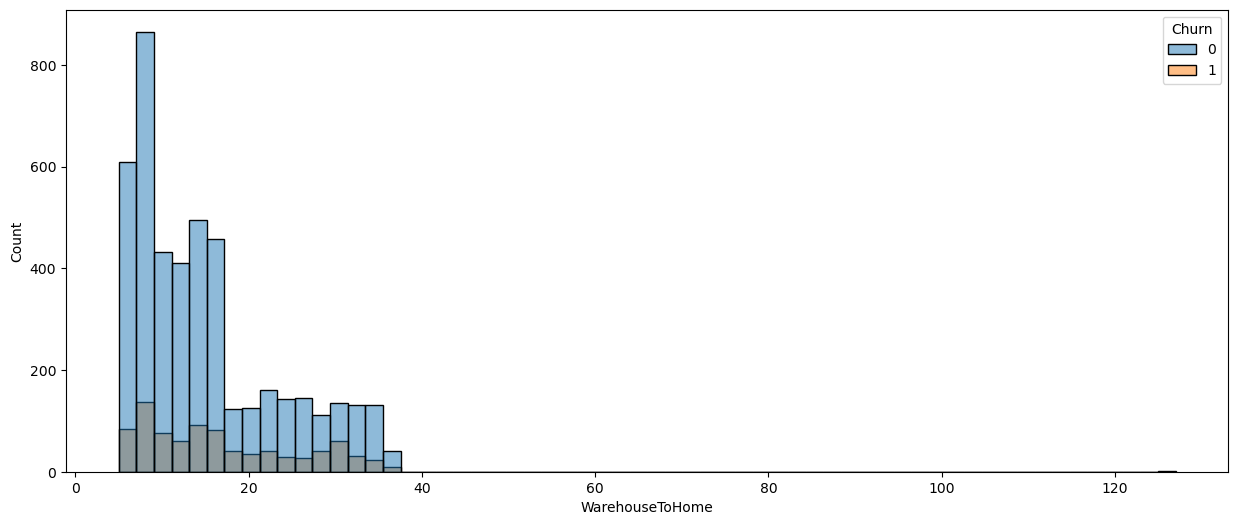

In [55]:
plt.figure(figsize = (15, 6))
sns.histplot(x = df['WarehouseToHome'], hue = df['Churn'], bins = 60)

<Axes: xlabel='Churn', ylabel='WarehouseToHome'>

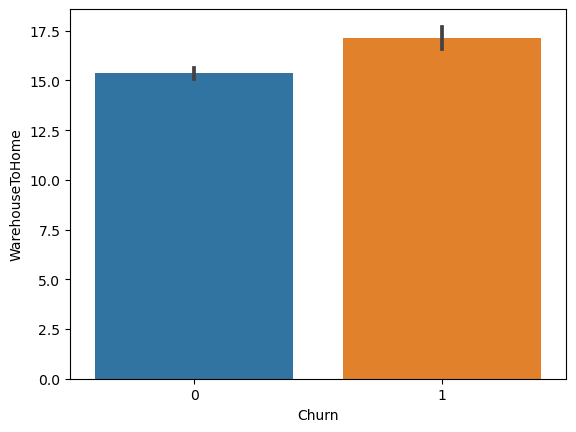

In [56]:
sns.barplot(x=df['Churn'] ,y=df['WarehouseToHome'])

From above chart we can seen that, The customers who churns whose average WarehouseToHome is more

In [57]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

We can see that this column has many redundant values, like<b> CC</b> and <b>Credit Card</b> means the same thing and <b>COD</b> and <b>Cash on Delivery</b> are same.

In [58]:
df['PreferredPaymentMode'].replace({'Credit Card':'CC','Cash on Delivery':'COD'}, inplace = True)


In [59]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

In [60]:
order=df['PreferredPaymentMode'].value_counts().reset_index()
order

,index,PreferredPaymentMode
0,Debit Card,2314
1,CC,1774
2,E wallet,614
3,COD,514
4,UPI,414


<Axes: xlabel='PreferredPaymentMode', ylabel='index'>

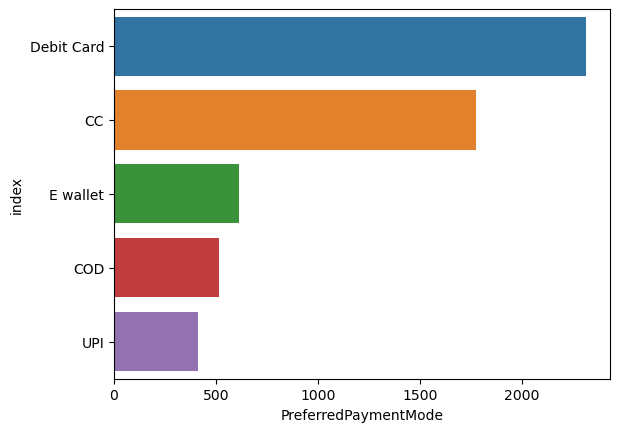

In [61]:
sns.barplot(x=order['PreferredPaymentMode'] , y=order['index'])

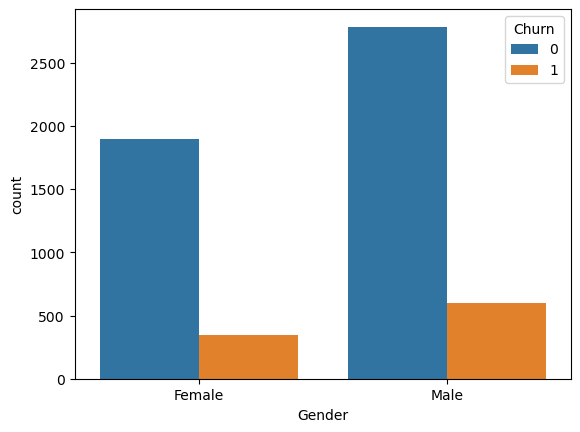

In [62]:
gd=sns.countplot(x=df['Gender'],hue=df['Churn'])

In [63]:
calculate_ratio(gd)

without_churn [1898.0, 2784.0]
with_churn [348.0, 600.0]
ratio [0.1833508956796628, 0.21551724137931033]


<b>Male has high churn ration.

<Axes: xlabel='HourSpendOnApp', ylabel='count'>

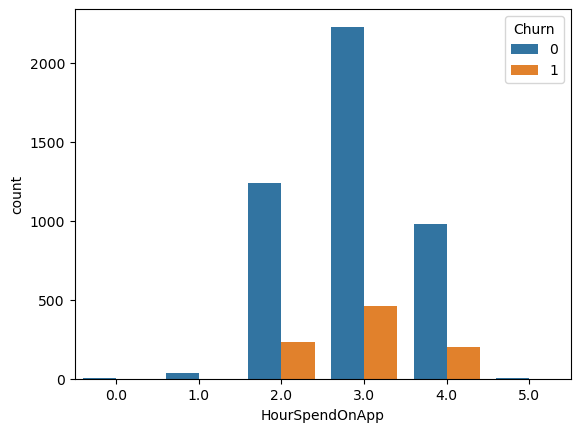

In [64]:
sns.countplot(x=df['HourSpendOnApp'],hue=df['Churn'])

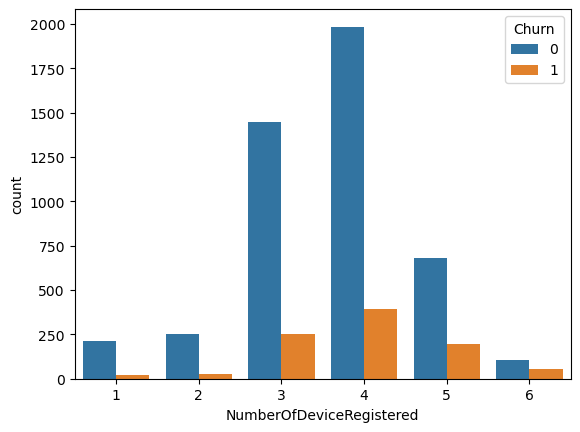

In [65]:
nd=sns.countplot(x=df['NumberOfDeviceRegistered'],hue=df['Churn'])

In [66]:
calculate_ratio(nd)

without_churn [213.0, 250.0, 1445.0, 1985.0, 683.0, 106.0]
with_churn [22.0, 26.0, 254.0, 392.0, 198.0, 56.0]
ratio [0.10328638497652583, 0.104, 0.17577854671280277, 0.19748110831234256, 0.28989751098096633, 0.5283018867924528]


Here we can see that  ratio of NumberOfDeviceRegistered 5 and 6 is high ,so customer with more NumberOfDeviceRegistered Churn ratio is high

In [67]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

We can see that this column has many redundant values,like <b>Mobile</b> and <b>Mobile Phone</b> means same 

In [68]:
df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'} ,inplace=True)

In [69]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

In [70]:
cat=df['PreferedOrderCat'].value_counts().reset_index()
cat

,index,PreferedOrderCat
0,Mobile Phone,2080
1,Laptop & Accessory,2050
2,Fashion,826
3,Grocery,410
4,Others,264


<Axes: xlabel='PreferedOrderCat', ylabel='index'>

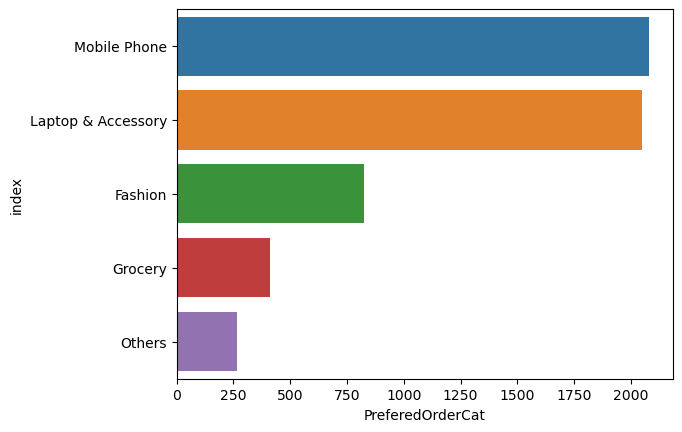

In [71]:
sns.barplot(x=cat['PreferedOrderCat'] ,y=cat['index'])

From the above the graph, we can see that the preferred category is Laptop and Accessory.



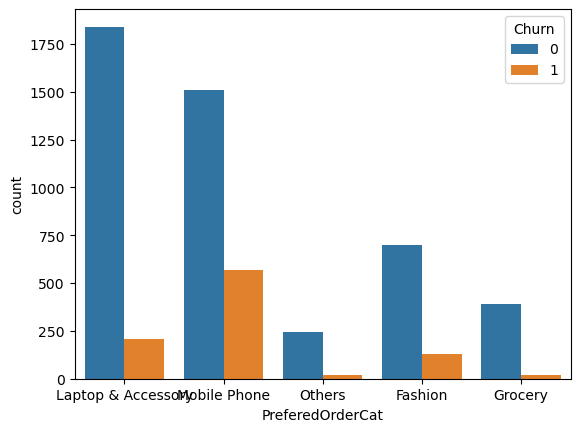

In [72]:
po=sns.countplot(x=df['PreferedOrderCat'] ,hue=df['Churn'])

In [73]:
calculate_ratio(po)

without_churn [1840.0, 1510.0, 244.0, 698.0, 390.0]
with_churn [210.0, 570.0, 20.0, 128.0, 20.0]
ratio [0.11413043478260869, 0.37748344370860926, 0.08196721311475409, 0.1833810888252149, 0.05128205128205128]


So from the above ratios, we have seen that mobile has the maximum ratio. The customers who churn mostly prefer mobile phones. This means that there is some issue with mobile phones. Either the quality is not good or the services are not good. Maybe customers prefer to buy other things like grocery or laptop in-person.

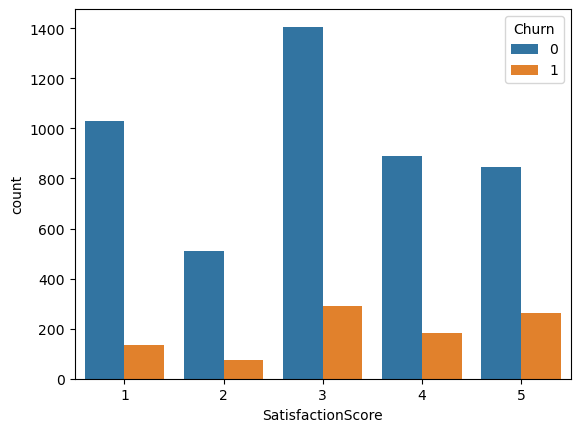

In [74]:
ss=sns.countplot(x=df['SatisfactionScore'] ,hue=df['Churn'])

In [75]:
calculate_ratio(ss)

without_churn [1030.0, 512.0, 1406.0, 890.0, 844.0]
with_churn [134.0, 74.0, 292.0, 184.0, 264.0]
ratio [0.13009708737864079, 0.14453125, 0.20768136557610242, 0.20674157303370785, 0.3127962085308057]


we seen that when low satisfactionScore high chance to churn 

In [76]:
df['MaritalStatus'].value_counts().reset_index()

,index,MaritalStatus
0,Married,2986
1,Single,1796
2,Divorced,848


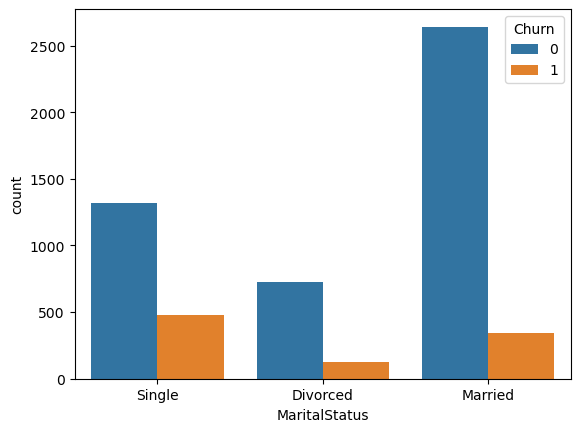

In [77]:
ms=sns.countplot(x=df['MaritalStatus'] ,hue=df['Churn'])

In [78]:
calculate_ratio(ms)

without_churn [1316.0, 724.0, 2642.0]
with_churn [480.0, 124.0, 344.0]
ratio [0.364741641337386, 0.1712707182320442, 0.13020439061317185]


The customers who are single are more likely to churn.



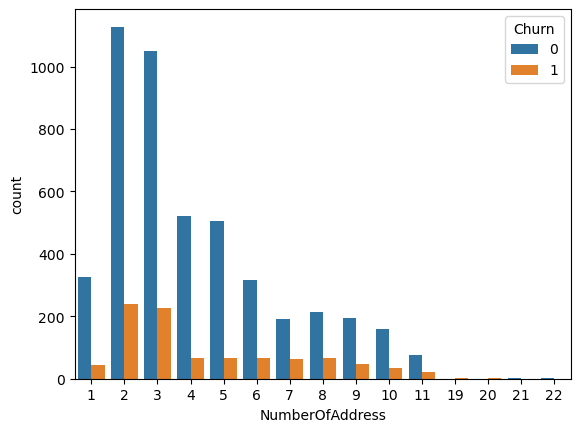

In [79]:
na=sns.countplot(x=df['NumberOfAddress'] ,hue=df['Churn'])

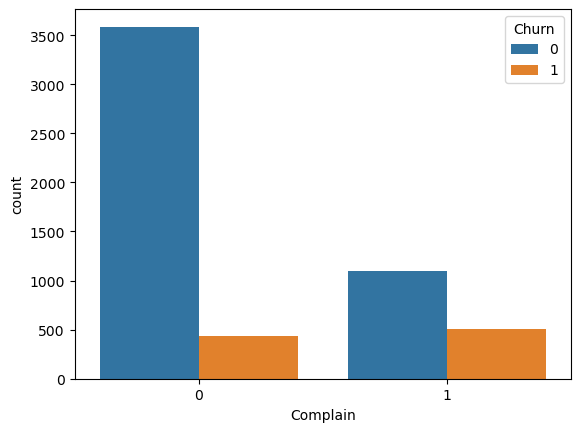

In [80]:
cp=sns.countplot(x=df['Complain']  ,hue=df['Churn'] )

In [81]:
calculate_ratio(cp)

without_churn [3586.0, 1096.0]
with_churn [440.0, 508.0]
ratio [0.12269938650306748, 0.4635036496350365]


we can see that customer with Complain has high Churn ratio

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Count'>

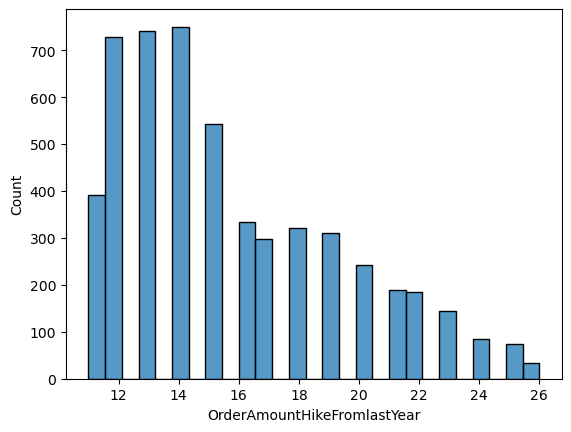

In [82]:
sns.histplot(x = df['OrderAmountHikeFromlastYear'])


From the graph, we can understand that the maximum hike last year was around 12-14%.



<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Count'>

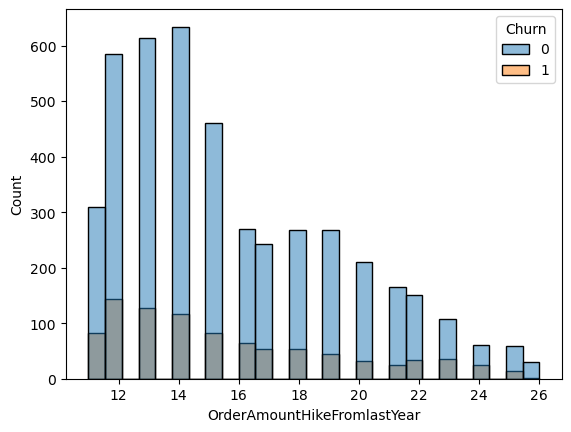

In [83]:
sns.histplot(x = df['OrderAmountHikeFromlastYear'], hue = df['Churn'])


<Axes: xlabel='CouponUsed', ylabel='Count'>

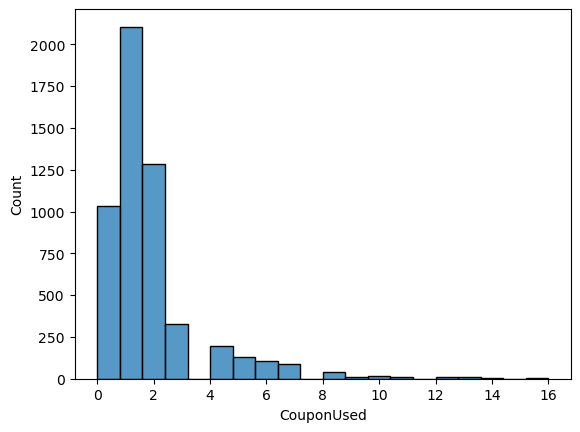

In [84]:
sns.histplot(x = df['CouponUsed'], bins = 20)


Mostly customer use 1-2 coupon in last month .Very few customers preferred more than 5 coupons.

<Axes: xlabel='CouponUsed', ylabel='Count'>

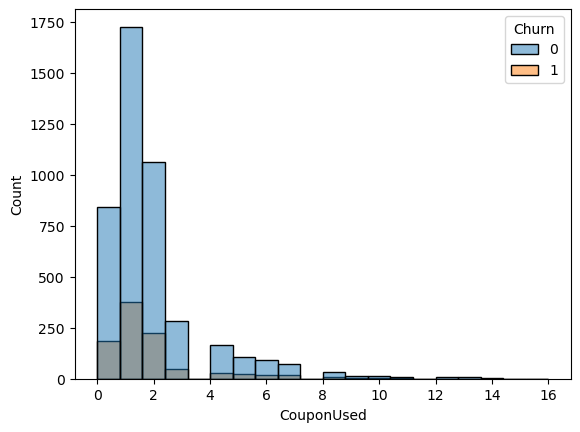

In [85]:
sns.histplot(x = df['CouponUsed'], hue = df['Churn'], bins = 20)


People with less coupons are more likely to churn. Customers who applied more than 5 coupons, have retained. This can be because they got some extra benefits using those coupons.

<Axes: xlabel='OrderCount', ylabel='Count'>

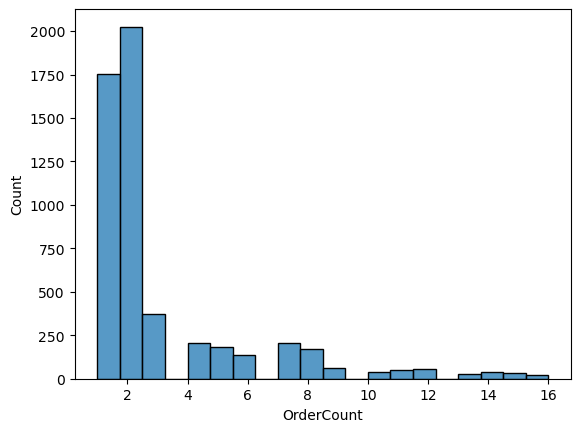

In [86]:
sns.histplot(x = df['OrderCount'], bins = 20)


<Axes: xlabel='OrderCount', ylabel='Count'>

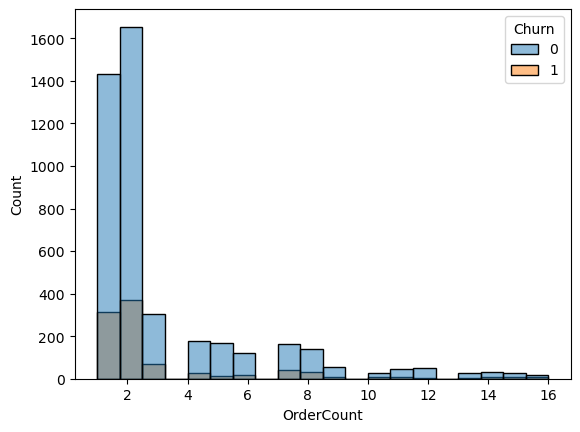

In [87]:
sns.histplot(x = df['OrderCount'], hue = df['Churn'], bins = 20)


In [88]:
df['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

<Axes: xlabel='DaySinceLastOrder', ylabel='Count'>

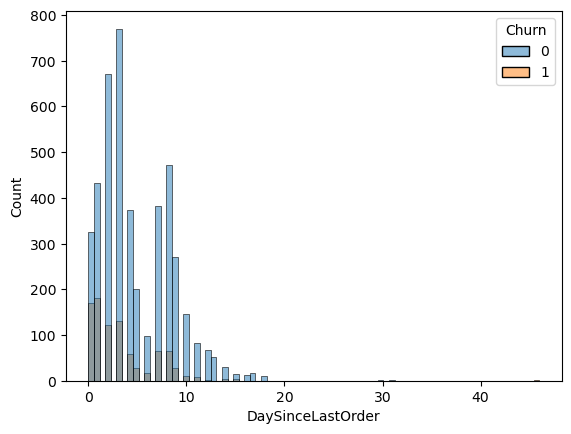

In [89]:
sns.histplot(x=df['DaySinceLastOrder'] ,hue=df['Churn'])

<Axes: xlabel='CashbackAmount', ylabel='Density'>

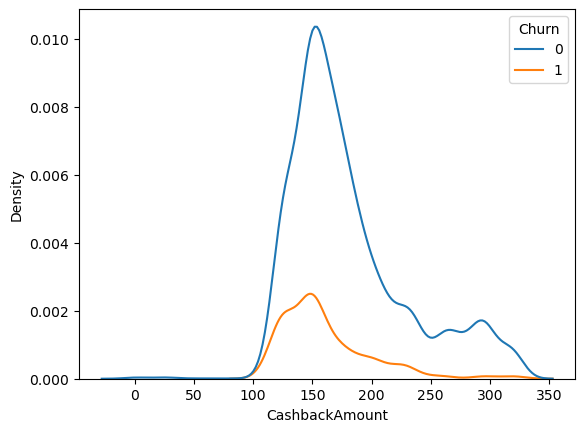

In [90]:
sns.kdeplot(x = df['CashbackAmount'], hue = df['Churn'])


If the cashback value is very high, then there are less chances to churn.



<Axes: xlabel='WarehouseToHome', ylabel='Complain'>

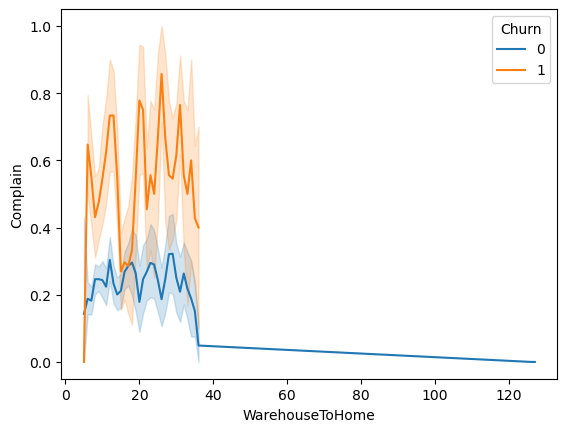

In [91]:
sns.lineplot(x = df['WarehouseToHome'], y = df['Complain'], hue = df['Churn'])


from the above graph, we can see that most of the customers that churn are having more complaints. This shows that the organsation or the company should focus on resolving the customer complaints. We can say that complaints is one of the reasons for customer churn.

In [92]:
df.groupby('Gender').mean()['HourSpendOnApp']

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\4245584001.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['HourSpendOnApp']


Gender
Female    2.948076
Male      2.920447
Name: HourSpendOnApp, dtype: float64

<Axes: xlabel='Gender', ylabel='HourSpendOnApp'>

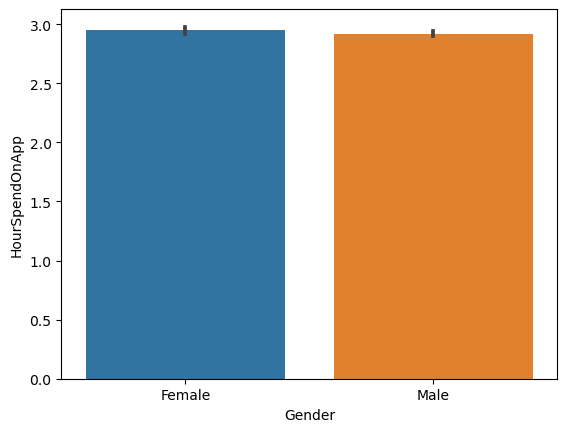

In [93]:
sns.barplot(x = df['Gender'], y = df['HourSpendOnApp'])


nearly both men and women use the app for the same time, so no gender bias



<Axes: xlabel='CityTier', ylabel='OrderAmountHikeFromlastYear'>

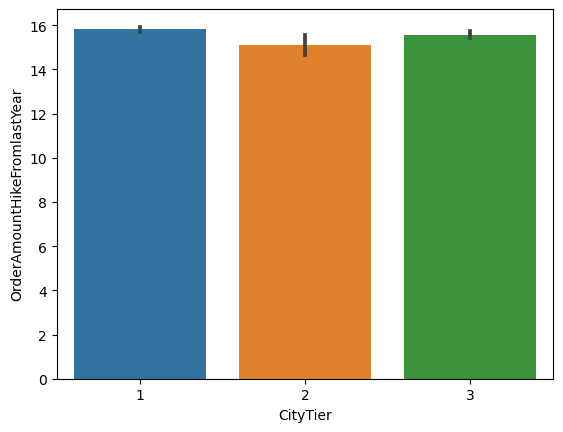

In [94]:
sns.barplot(x=df['CityTier'] ,y=df['OrderAmountHikeFromlastYear'])

maximum amount hike happened through tier 1 city



<Axes: xlabel='Complain', ylabel='SatisfactionScore'>

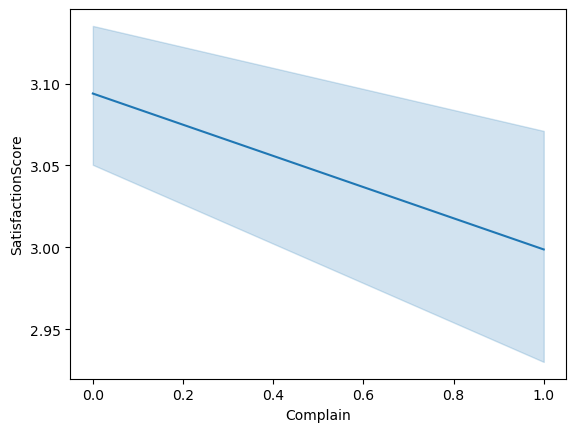

In [95]:
sns.lineplot(x = df['Complain'], y = df['SatisfactionScore'])


When complaints are less, then the satisfaction score is more. This means customers with more complaints have less satisfaction score and the organisation need to resolve the issues of these customers to increase the satisfaction score.

<Axes: xlabel='WarehouseToHome', ylabel='SatisfactionScore'>

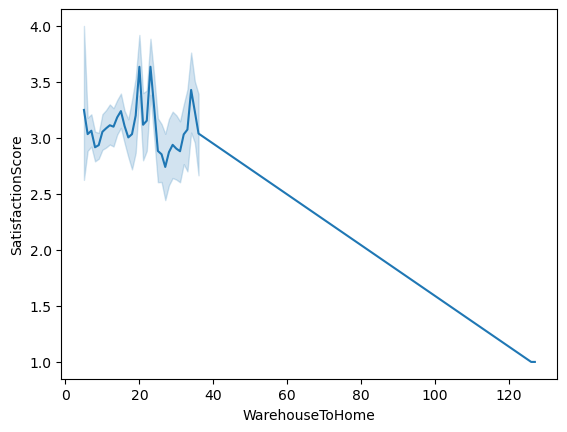

In [96]:
sns.lineplot(x = df['WarehouseToHome'], y = df['SatisfactionScore'])


as the distance increases the satisfaction score reduces, this means that we can setup warehouses such that it is closer to maximum number of customers. Or group the customers and then set up new warehosues on the basis of satisfaction score.



In [97]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [98]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<b>Checking the inconsistent data values in each column



In [100]:
df['CustomerID'].unique()

array([50001, 50002, 50003, ..., 55628, 55629, 55630], dtype=int64)

In [101]:
for key, value in df['CustomerID'].items():
  if not isinstance(value, int):
    print(value)
     

In [102]:
df['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In Tenure there are some missing values

In [103]:
df['PreferredLoginDevice'].unique()

array(['Phone', 'Computer'], dtype=object)

In [104]:
df['CityTier'].unique()

array([3, 1, 2], dtype=int64)

In [105]:
df['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

WareHouse To Home has NaN value



In [106]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

In [107]:
df['NumberOfDeviceRegistered'].unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

In [108]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

In [109]:
df['SatisfactionScore'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [110]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [111]:
df['NumberOfAddress'].unique()

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22],
      dtype=int64)

In [112]:
df['Complain'].unique()

array([1, 0], dtype=int64)

In [113]:
df['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

OrderAmountHikeFromLastYear has  NaN value

In [114]:
df['CouponUsed'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

CouponUsed has NaN value



In [115]:
df['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

Order Count has NaN value



In [116]:
df['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

DaySince Last Order has a NaN value



In [117]:
df['CashbackAmount'].unique()

array([159.93, 120.9 , 120.28, ..., 173.77, 287.91, 173.78])

As we can see, there are many columns with missing values.



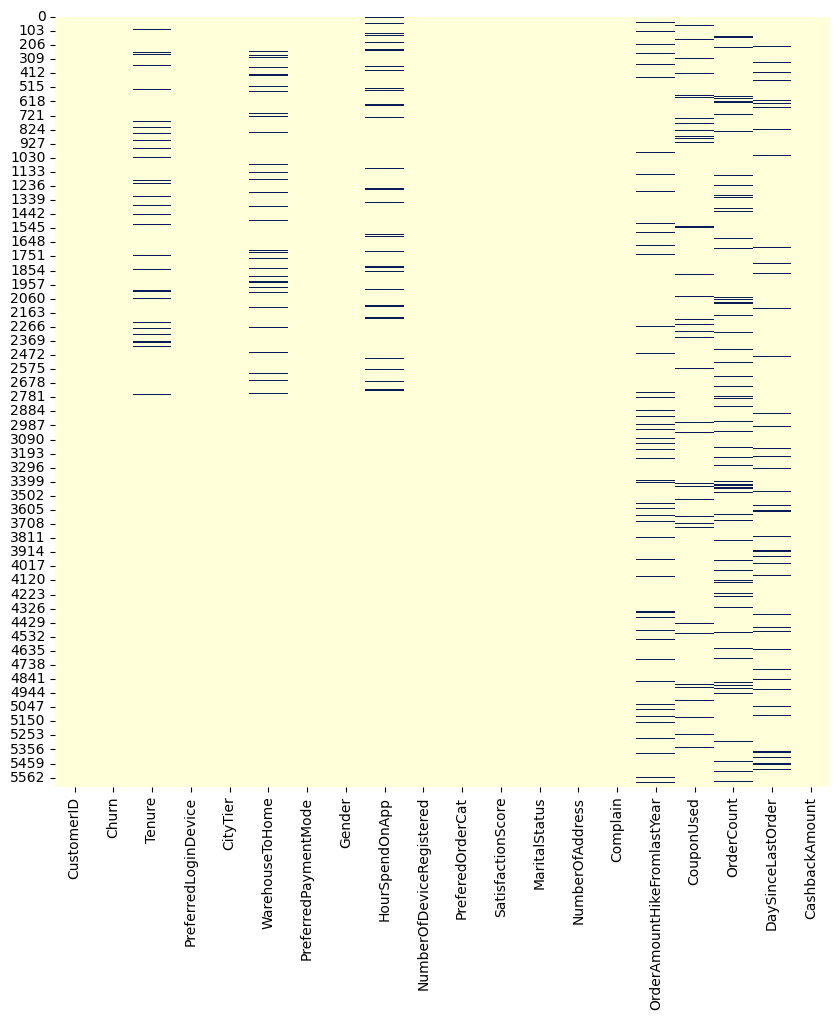

In [118]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.isnull(), cbar = False, cmap = "YlGnBu")
plt.show()

We used this heatmap to see, if the missing values shared same row or all are from different rows. As we can see the missing are non-uniformly distributed throughout the dataset. So dropping the rows can't be option. That will lead to huge data loss. One of the ways to handle or deal with these missing values is KNNImputer.

Now we want to check wheter in any column has outlier , if outliers are detected so we have to treat them , Because they effect our machine learning algorithm.

In [119]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


check if outliers present in Tenure column

In [120]:
df['Tenure'].describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

In [121]:
df['Tenure'].skew()

0.7365133838993447

now we seen that our coloumn is postively skewed , so IQR method is best for treat outliers

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\4181926839.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure'])


<Axes: xlabel='Tenure', ylabel='Density'>

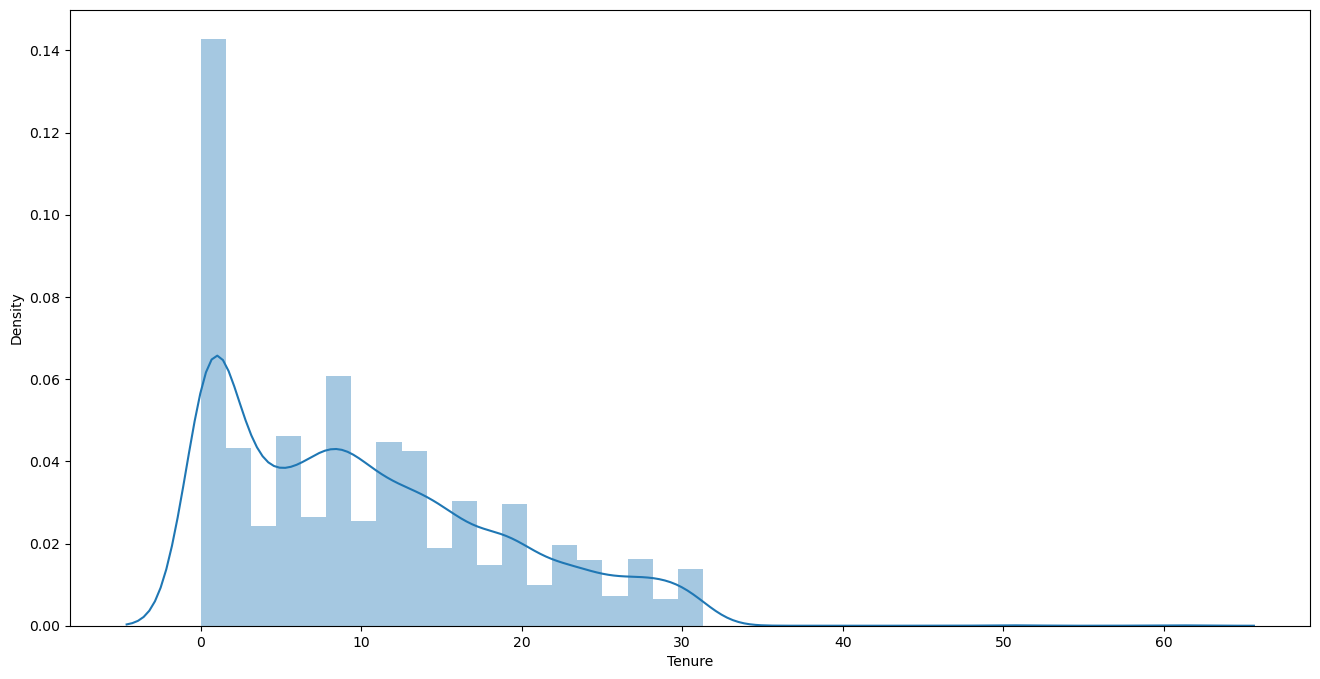

In [122]:
plt.figure(figsize=(16,8))

plt.subplot()
sns.distplot(df['Tenure'])

<Axes: >

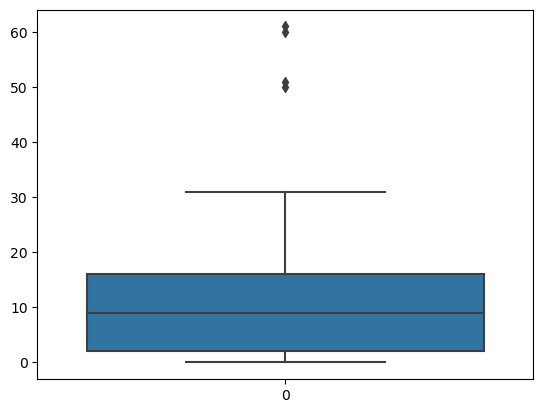

In [123]:
sns.boxplot(df['Tenure'])

In [124]:
# Finding the IQR
percentile25 = df['Tenure'].quantile(0.25)
percentile75 = df['Tenure'].quantile(0.75)

In [125]:
iqr = percentile75 - percentile25

In [126]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [127]:
upper_limit

37.0

In [128]:
lower_limit

-19.0

In [129]:
df['Tenure_update'] = np.where(
    df['Tenure'] > upper_limit,
    upper_limit,
    np.where(
        df['Tenure'] < lower_limit,
        lower_limit,
        df['Tenure']
    )
)

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\3155015482.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure'])
C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\3155015482.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure_update'])


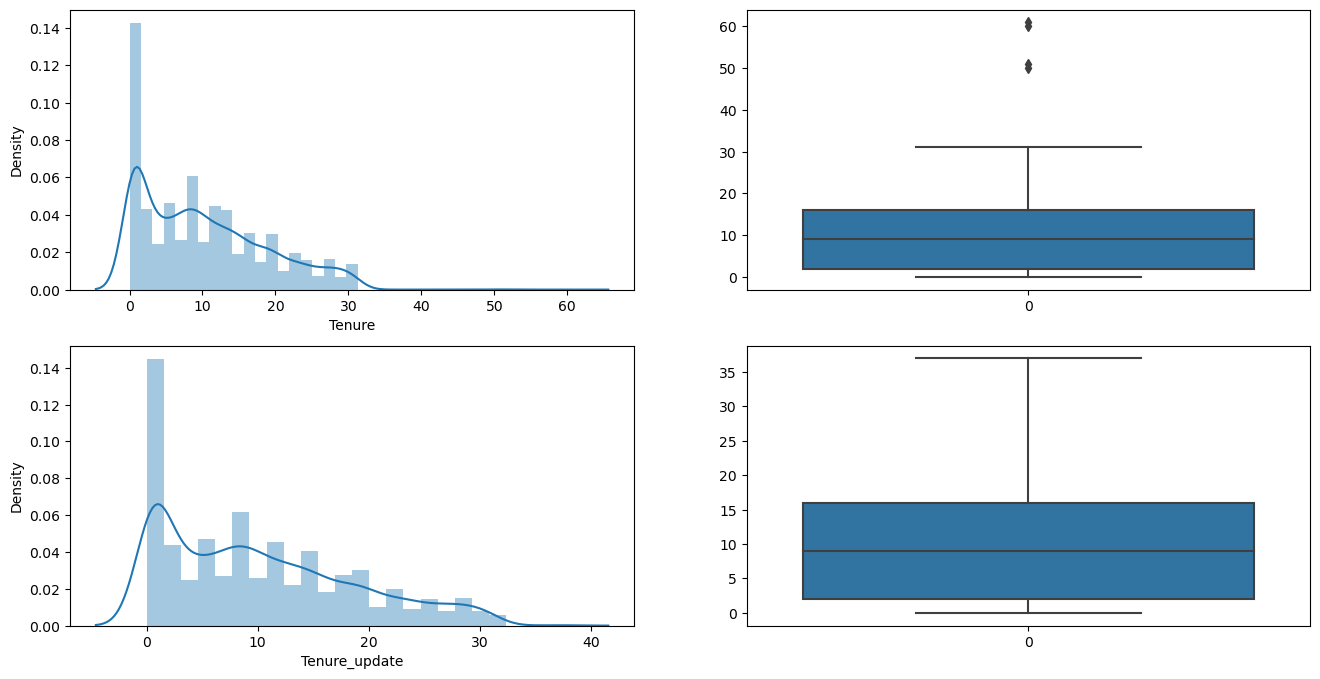

In [130]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Tenure'])

plt.subplot(2,2,2)
sns.boxplot(df['Tenure'])

plt.subplot(2,2,3)
sns.distplot(df['Tenure_update'])

plt.subplot(2,2,4)
sns.boxplot(df['Tenure_update'])




plt.show()

In [131]:
df['WarehouseToHome'].describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\1239042370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WarehouseToHome'])


<Axes: xlabel='WarehouseToHome', ylabel='Density'>

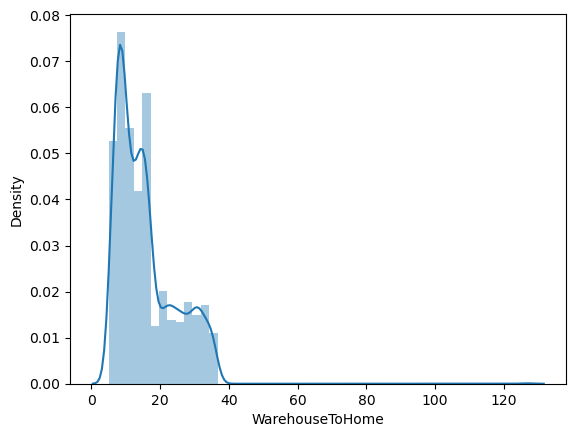

In [132]:
sns.distplot(df['WarehouseToHome'])

In [133]:
df['WarehouseToHome'].skew()

1.619153668208649

Here we can see that very high skewness is present in coloumn 

<Axes: >

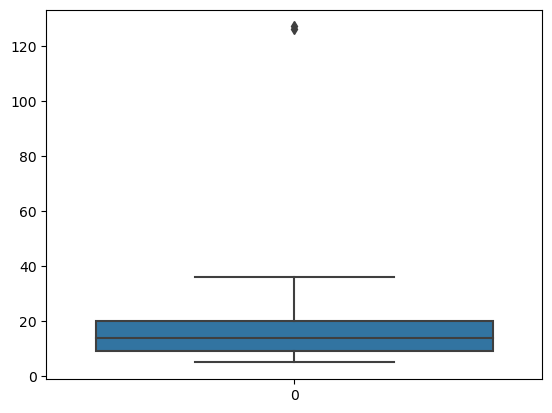

In [134]:
sns.boxplot(df['WarehouseToHome'])

In [135]:
# Finding the IQR
percentile25 = df['WarehouseToHome'].quantile(0.25)
percentile75 = df['WarehouseToHome'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit2 = percentile75 + 1.5 * iqr
lower_limit2 = percentile25 - 1.5 * iqr



In [136]:
df['WarehouseToHome_update'] = np.where(
    df['WarehouseToHome'] > upper_limit2,
    upper_limit2,
    np.where(
        df['WarehouseToHome'] < lower_limit2,
        lower_limit2,
        df['WarehouseToHome']
    )
)

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\3155015482.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure'])
C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\3155015482.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure_update'])


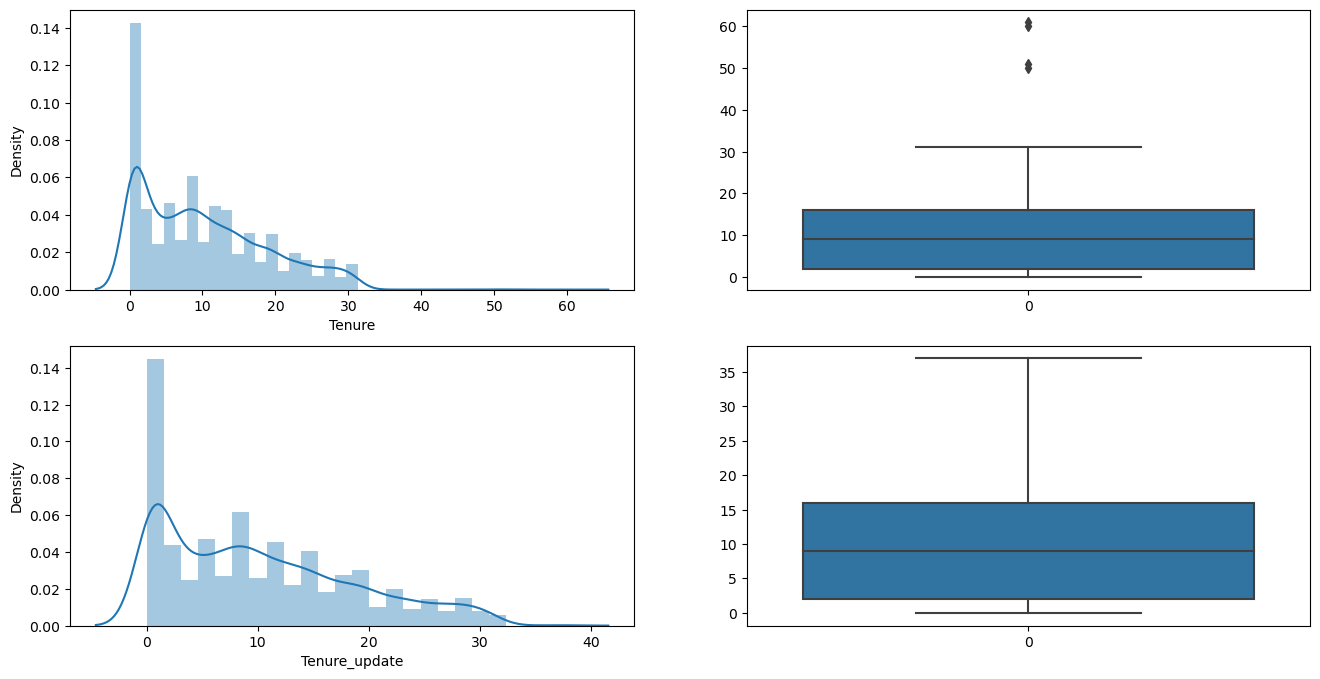

In [137]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Tenure'])

plt.subplot(2,2,2)
sns.boxplot(df['Tenure'])

plt.subplot(2,2,3)
sns.distplot(df['Tenure_update'])

plt.subplot(2,2,4)
sns.boxplot(df['Tenure_update'])




plt.show()

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_25208\545142763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OrderAmountHikeFromlastYear'])


<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

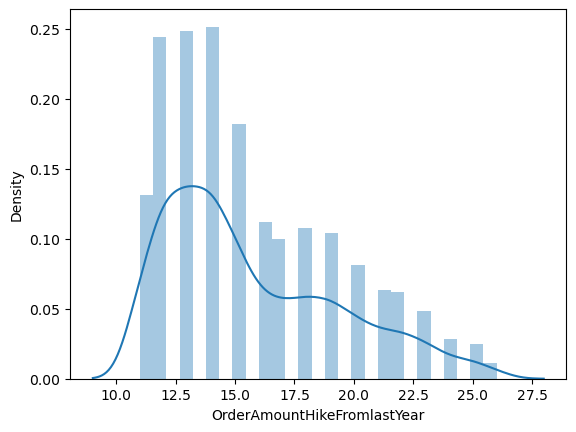

In [138]:
sns.distplot(df['OrderAmountHikeFromlastYear'])

In [139]:
df['OrderAmountHikeFromlastYear'].describe()

count    5365.000000
mean       15.707922
std         3.675485
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64

We can see that there are no such more columns with outliers which effects much more to any models.

In [140]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_update,WarehouseToHome_update
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,4.0,6.0
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,NaN,8.0
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,NaN,30.0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.0,15.0
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,0.0,12.0


In [141]:
df=df.drop(["Tenure","WarehouseToHome"] ,axis="columns")

In [142]:
df.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_update,WarehouseToHome_update
0,50001,1,Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,4.0,6.0
1,50002,1,Phone,1,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,NaN,8.0
2,50003,1,Phone,1,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,NaN,30.0
3,50004,1,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.0,15.0
4,50005,1,Phone,1,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,0.0,12.0


In [143]:
df.to_csv('E_Commerce_Churn_cleaned.csv', index = False)


In [116]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [117]:
X = df.loc[:, df.columns != 'Churn']


In [118]:
X.head()

,CustomerID,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_update,WarehouseToHome_update
0,50001,Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,4.0,6.0
1,50002,Phone,1,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,NaN,8.0
2,50003,Phone,1,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,NaN,30.0
3,50004,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.0,15.0
4,50005,Phone,1,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,0.0,12.0


In [122]:
Y = df['Churn']

In [123]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
x_train.shape, x_test.shape

((3941, 19), (1689, 19))

In [124]:
#ColumnTransformer for one hot encoding 
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

trf1=ColumnTransformer(transformers=[
    ('one_hot' , OneHotEncoder(sparse_output=False,handle_unknown="ignore" ) ,cat_features)
],remainder="passthrough")

In [125]:
#ColumnTransformer for handling Missing values

trf2=ColumnTransformer([
    ('KNNimputer' ,KNNImputer(n_neighbors=5),slice(0,32) )
    
],remainder='passthrough')

In [126]:
#ColumnTransformer for feature scalling

trf3=ColumnTransformer([
    ('scale' , StandardScaler() ,slice(0,32) )
],remainder="passthrough")

In [127]:
rf_classifier=RandomForestClassifier()
lr_classifier=LogisticRegression()
dt_classifier=DecisionTreeClassifier()
Ab_classifier=AdaBoostClassifier()
sv_classifier=SVC()

In [128]:
pipeline_lr=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",lr_classifier)
])

In [129]:
pipeline_rf=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",rf_classifier)
])

In [130]:
pipeline_dt=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",dt_classifier)
])

In [131]:
pipeline_Ab=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",Ab_classifier)
])

In [132]:
pipeline_sv=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",sv_classifier)
])

In [133]:
## LEts make the list of pipelines

pipelines = [pipeline_Ab,pipeline_dt,pipeline_lr,pipeline_rf,pipeline_sv]

In [134]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'AdaBoost', 1: 'Decision Tree', 2: 'Logistic Regression' , 3: 'RandomForest',4:'svc'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y_train)

In [135]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

AdaBoost Test Accuracy: 0.8910597986974541
Decision Tree Test Accuracy: 0.931320307874482
Logistic Regression Test Accuracy: 0.8863232682060391
RandomForest Test Accuracy: 0.9502664298401421
svc Test Accuracy: 0.9029011249259917


In [136]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [137]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy  : {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy  : RandomForest


In [138]:
for i,pipe in enumerate(pipelines ):
 cvscore=cross_val_score(pipe,x_train,y_train,cv=5,scoring="accuracy").mean()
 print (f"{pipe_dict[i]} cross val accuracy {cvscore}")
 


AdaBoost cross val accuracy 0.8941897795191498
Decision Tree cross val accuracy 0.9127141597987558
Logistic Regression cross val accuracy 0.894950235792914
RandomForest cross val accuracy 0.9403701273217399
svc cross val accuracy 0.9096668661095133


<h3>Pipelines Perform Hyperparameter Tuning Using Grid SearchCV</h3>

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
# Create a pipeline
pipe = Pipeline([ 
     ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("classifier", RandomForestClassifier())
    ])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10,50,150,100,500, 1000],
                 "classifier__criterion":[gini, entropy, log_loss],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(x_train,y_train)

NameError: name 'gini' is not defined

In [140]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(x_test,y_test))

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object'))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('KNNimputer', KNNImputer(),
                                                  slice(0, 32, None))])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 32, None))])),
                ('c